## 处理日线数据，移除最后一行，选取上市大于3年的股票作为研究对象
## 加入macd， zigzag数据并存入文件中。

In [2]:
import os
import glob
import pandas as pd 
import chardet
import shutil

path = '/Users/kevin_gwdong/djangoproject/tensorflow/quantity/daydata' 
path_new = '/Users/kevin_gwdong/djangoproject/tensorflow/quantity/daydata/keep/'
all_files = glob.glob(path + "/*.csv")



for filename in all_files:
    
    with open(filename, 'rb') as f:
        result = chardet.detect(f.read())  # or readline if the file is large
    df = pd.read_csv(filename, encoding=result['encoding'], index=False)
    df.drop(df.tail(1).index,inplace=True)
    
    
    
    
    if len(df.index) > 250*3: # save to another folder
        head, tail = os.path.split(filename)
        print(tail)
        df.to_csv(os.path.join(path_new, tail))
#     else : 
#         print(filename)
        
        

###  选取 当前价值 < 100 的股票进行研究

In [3]:
import simplejson

ModuleNotFoundError: No module named 'simplejson'

In [1]:
import os
import glob
import pandas as pd 
import chardet
import shutil
import simplejson

path = '/Users/kevin_gwdong/djangoproject/tensorflow/quantity/daydata/keep/'    
files = glob.glob(os.path.join(path,'*.csv'))

i = 1
filelist = []
for filename in glob.glob(os.path.join(path, '*.csv')):
    realdata = pd.read_csv(filename)
    if (realdata.iloc[-1][2] < 20) & (realdata.iloc[-1][2] > 5):
        filelist.append(filename)

    

f = open('stockname.json', 'w')
simplejson.dump(filelist, f)     
f.close()

print(filelist)
                 

['/Users/kevin_gwdong/djangoproject/tensorflow/quantity/daydata/keep/002389.csv', '/Users/kevin_gwdong/djangoproject/tensorflow/quantity/daydata/keep/002362.csv', '/Users/kevin_gwdong/djangoproject/tensorflow/quantity/daydata/keep/002404.csv', '/Users/kevin_gwdong/djangoproject/tensorflow/quantity/daydata/keep/600048.csv', '/Users/kevin_gwdong/djangoproject/tensorflow/quantity/daydata/keep/000561.csv', '/Users/kevin_gwdong/djangoproject/tensorflow/quantity/daydata/keep/002376.csv', '/Users/kevin_gwdong/djangoproject/tensorflow/quantity/daydata/keep/002438.csv', '/Users/kevin_gwdong/djangoproject/tensorflow/quantity/daydata/keep/603569.csv', '/Users/kevin_gwdong/djangoproject/tensorflow/quantity/daydata/keep/600060.csv', '/Users/kevin_gwdong/djangoproject/tensorflow/quantity/daydata/keep/600706.csv', '/Users/kevin_gwdong/djangoproject/tensorflow/quantity/daydata/keep/603958.csv', '/Users/kevin_gwdong/djangoproject/tensorflow/quantity/daydata/keep/000978.csv', '/Users/kevin_gwdong/django

In [1]:
import os
import glob
import pandas as pd 
import chardet
import shutil
import simplejson
import json
import talib
import numpy as np


selected_list = []
with open('stockname.json') as json_file:
    data = json.load(json_file)
    for p in data:
        try:
            df = pd.read_csv(p, header=None)
            del df[0]
            df.columns = ['date', 'open', 'high', 'low', 'close', 'volume', 'amount']
            ema = talib.SMA(df['close'], timeperiod=25)
            lastema = ema.values[-10]
            lastlow = df.loc[:,['low']].values[-10][0]
#             print(p)
#             print(lastema)
#             print(lastlow)
            if float(lastlow) > float(lastema) :
                selected_list.append(p)
        except:
            print(p)
            print("something wrong ")
            print()

# print(selected_list)
# print(len(selected_list))

f = open('selected_list.json', 'w')
simplejson.dump(selected_list, f)     
f.close()            
            

/Users/kevin_gwdong/djangoproject/tensorflow/quantity/daydata/keep/603569.csv
something wrong 

/Users/kevin_gwdong/djangoproject/tensorflow/quantity/daydata/keep/600060.csv
something wrong 

/Users/kevin_gwdong/djangoproject/tensorflow/quantity/daydata/keep/603958.csv
something wrong 

/Users/kevin_gwdong/djangoproject/tensorflow/quantity/daydata/keep/603025.csv
something wrong 

/Users/kevin_gwdong/djangoproject/tensorflow/quantity/daydata/keep/603031.csv
something wrong 

/Users/kevin_gwdong/djangoproject/tensorflow/quantity/daydata/keep/002772.csv
something wrong 

/Users/kevin_gwdong/djangoproject/tensorflow/quantity/daydata/keep/601020.csv
something wrong 

/Users/kevin_gwdong/djangoproject/tensorflow/quantity/daydata/keep/000401.csv
something wrong 

/Users/kevin_gwdong/djangoproject/tensorflow/quantity/daydata/keep/000429.csv
something wrong 

/Users/kevin_gwdong/djangoproject/tensorflow/quantity/daydata/keep/600115.csv
something wrong 

/Users/kevin_gwdong/djangoproject/tensor

In [2]:
with open('selected_list.json') as json_file:
    data = json.load(json_file)
    print(len(data))
with open('stockname.json') as json_file:
    data = json.load(json_file)
    print(len(data))

961
1447


In [2]:
import os
import glob
import pandas as pd 
import chardet
import shutil
import simplejson
import json
import talib
import numpy as np


diff_list = []
with open('selected_list.json') as json_file:
    data = json.load(json_file)
    for p in data:
        try:
            signal_diff_list = []
            df = pd.read_csv(p, header=None)
            del df[0]
            df.columns = ['date', 'open', 'high', 'low', 'close', 'volume', 'amount']
#             ema = talib.SMA(df['close'], timeperiod=25)
#             lastema = ema.values[-10]
            last_high_1 = df.loc[:,['high']].values[-10][0]
            pre_low_1 = df.loc[:,['low']].values[-11][0]
            dif_1 = last_high_1 - pre_low_1
            print(dif_1)
            last_high_2 = df.loc[:,['high']].values[-11][0]
            pre_low_2 = df.loc[:,['low']].values[-12][0]
            dif_2 = last_high_2 - pre_low_2
            print(dif_2)
            ave_dif = (dif_1 + dif_2)/2
            signal_diff_list.append(p)
            signal_diff_list.append(ave_dif)
            
            diff_list.append(signal_diff_list)
#             print(diff_list)
            
            print()
        except:
            print("something wrong again")
            print()
        
print(diff_list)

f = open('diff_list.json', 'w')
simplejson.dump(diff_list, f)     
f.close()      

0.11999999999999922
0.33999999999999986

0.5600000000000023
0.6999999999999993

0.11999999999999922
0.23000000000000043

0.13999999999999968
0.2400000000000002

0.27999999999999936
1.0999999999999996

something wrong again

0.08999999999999986
0.6400000000000006

0.0600000000000005
0.29000000000000004

0.08000000000000007
0.23000000000000043

0.11000000000000032
0.25

0.08000000000000007
0.1800000000000006

0.4399999999999995
0.22000000000000064

0.21999999999999886
0.8000000000000007

0.15000000000000036
0.41999999999999993

0.5600000000000005
0.9799999999999986

something wrong again

0.05999999999999961
0.20999999999999996

0.07000000000000028
0.22000000000000064

something wrong again

0.33000000000000007
0.6500000000000004

0.1999999999999993
0.2599999999999998

0.15000000000000036
0.41000000000000014

something wrong again

0.17999999999999972
0.6999999999999993

-0.25
0.3099999999999987

something wrong again

0.1200000000000001
0.1899999999999995

0.4399999999999995
0.830000000

In [1]:
from bokeh.models import TapTool, CustomJS, ColumnDataSource
from bokeh.io import output_notebook, show
from math import pi

import pandas as pd

from bokeh.plotting import figure, show, output_file
from bokeh.sampledata.stocks import MSFT
output_notebook()


df = pd.DataFrame(MSFT)[:50]
df["date"] = pd.to_datetime(df["date"])

inc = df.close > df.open
dec = df.open > df.close
w = 12*60*60*1000 # half day in ms

source = ColumnDataSource(df)

callback = CustomJS(args=dict(source=source), code=
                    """
                    var data = source.data;
                    // Get indices array of all selected items
                    var selected = source.selected;
                    console.log(selected)
 
//                    var selected = source;
//                    console.log(source); 
                    console.log(cb_obj)
//                    console.log(source.data)
                    """)
taptool = TapTool(callback=callback)


p = figure(x_axis_type="datetime", plot_width=1000, title = "MSFT Candlestick", tools=[taptool]) # 

p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3

# p.segment(df.date, df.high, df.date, df.low, color="black")
p.vbar(df.date, w, df.high, df.low, fill_color="#D5E1DD", line_color="black")

# p.vbar(df.date[inc], w, df.high, df.low, fill_color="#D5E1DD", line_color="black")
# p.vbar(df.date[dec], w, df.high, df.low, fill_color="#F2583E", line_color="black")

show(p)  # open a browser

Loading BokehJS ...

### 制作zigzag和macd指标

In [2]:
import pandas as pd
import zigzag
import numpy as np
import talib

path = '/Users/kevin_gwdong/djangoproject/tensorflow/quantity/daydata' 
path_test = '/Users/kevin_gwdong/djangoproject/tensorflow/quantity/daydata/test/'

df = pd.read_csv(path_test + "/000545.csv", header=None)
del df[0]
df.columns = ['date', 'open', 'high', 'low', 'close', 'volume', 'amount']
X = np.array(df.loc[:]['close'].tolist())
df['zigzag'] = zigzag.peak_valley_pivots(X, 0.015, -0.015)
df['ema25'] = talib.EMA(df['close'], timeperiod=25)
df['diff'], df['dea'], df['macdbar'] = talib.MACD(df['close'], fastperiod=12, slowperiod=26, signalperiod=9) 





### 计算 ema25 和 close 交叉特征

In [29]:
# print(df.loc[100:200, ['date', 'diff', 'dea' , 'macdbar']])
previous_close = df['close'].shift(1)
previous_ema25 = df['ema25'].shift(1)

# double direction cross
# crossing_double = (((df['close'] <= df['ema25']) & (previous_close >= previous_ema25))
#             | ((df['close'] >= df['ema25']) & (previous_close <= previous_ema25)))

# only cross up trend
crossing_up = ((df['close'] >= df['ema25']) & (previous_close <= previous_ema25)) 

crossing_dates_up = df.loc[crossing_up, 'date']
print(crossing_up) 

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
3951    False
3952    False
3953    False
3954    False
3955    False
3956    False
3957    False
3958    False
3959    False
3960    False
3961    False
3962    False
3963    False
3964    False
3965    False
3966    False
3967    False
3968    False
3969     True
3970    False
3971    False
3972    False
3973    False
3974    False
3975    False
3976    False
3977    False
3978    False
3979    False
3980    False
Length: 3981, dtype: bool


In [12]:
import numpy as np

breaks = []
pivots = df['zigzag']
Y = np.array(df.loc[:]['close'].tolist())
org_X = np.array(df.loc[:])


combine_list=np.column_stack((np.arange(len(Y))[pivots!=0],Y[pivots != 0]))
# print(combine_list)

for i in np.arange(len(combine_list)-4):
    current_max = np.amax(combine_list[[i,i+1],[1]])
    next_min = np.amin(combine_list[[i+2,i+3],[1]])
    current_min = np.amin(combine_list[[i,i+1],[1]])
    next_max = np.amax(combine_list[[i+2,i+3],[1]])

    if next_min > current_max :
#             this is up
#             composite index, datetime, next_index, next_date
        breaks.append( [combine_list[i+1].tolist(), org_X[combine_list[i+1][0].astype(int)][0], combine_list[i+2].tolist(), org_X[combine_list[i+2][0].astype(int)][0], "up"] )
    elif current_min > next_max :
#             this is down
        breaks.append( [combine_list[i+1].tolist(), org_X[combine_list[i+1][0].astype(int)][0], combine_list[i+2].tolist(), org_X[combine_list[i+2][0].astype(int)][0], "Down"] )

#     if i > len(combine_list)-4 :
        
    
print(breaks)


[[[13.0, 1.48], '2000-01-21', [21.0, 2.36], '2000-02-16', 'up'], [[23.0, 2.21], '2000-02-18', [26.0, 2.02], '2000-02-23', 'Down'], [[28.0, 2.04], '2000-02-25', [31.0, 2.27], '2000-03-01', 'up'], [[37.0, 2.39], '2000-03-09', [42.0, 1.98], '2000-03-16', 'Down'], [[46.0, 2.09], '2000-03-22', [49.0, 2.34], '2000-03-27', 'up'], [[51.0, 2.17], '2000-03-29', [57.0, 2.51], '2000-04-06', 'up'], [[62.0, 2.39], '2000-04-13', [65.0, 2.27], '2000-04-18', 'Down'], [[66.0, 2.31], '2000-04-19', [70.0, 2.16], '2000-04-25', 'Down'], [[80.0, 2.12], '2000-05-17', [88.0, 2.45], '2000-05-29', 'up'], [[94.0, 2.42], '2000-06-06', [99.0, 2.79], '2000-06-13', 'up'], [[111.0, 2.82], '2000-06-29', [115.0, 2.34], '2000-07-05', 'Down'], [[123.0, 2.24], '2000-07-17', [130.0, 2.53], '2000-07-26', 'up'], [[131.0, 2.47], '2000-07-27', [138.0, 2.74], '2000-08-07', 'up'], [[141.0, 2.62], '2000-08-10', [148.0, 3.04], '2000-08-21', 'up'], [[154.0, 3.05], '2000-08-29', [157.0, 2.74], '2000-09-01', 'Down'], [[164.0, 2.89], '

### 找出趋势线。

In [57]:
import numpy as np

breaks = []
pivots = df['zigzag']
Y = np.array(df.loc[:]['close'].tolist())

combine_list=np.column_stack((np.arange(len(Y))[pivots!=0],Y[pivots != 0]))
# print(combine_list)

for i in np.arange(len(combine_list)-4):
    current_max = np.amax(combine_list[[i,i+1],[1]])
    next_min = np.amin(combine_list[[i+2,i+3],[1]])
    current_min = np.amin(combine_list[[i,i+1],[1]])
    next_max = np.amax(combine_list[[i+2,i+3],[1]])

    if next_min > current_max :
#             this is up
#             composite index, datetime, next_index, next_date
        breaks.append( [combine_list[i+1].tolist(), combine_list[i+2].tolist(), "up"] )
    elif current_min > next_max :
#             this is down
        breaks.append( [combine_list[i+1].tolist(), combine_list[i+2].tolist(), "Down"] )

#     if i > len(combine_list)-4 :
        
    
print(breaks)

[[[13.0, 1.48], [21.0, 2.36], 'up'], [[23.0, 2.21], [26.0, 2.02], 'Down'], [[28.0, 2.04], [31.0, 2.27], 'up'], [[37.0, 2.39], [42.0, 1.98], 'Down'], [[46.0, 2.09], [49.0, 2.34], 'up'], [[51.0, 2.17], [57.0, 2.51], 'up'], [[62.0, 2.39], [65.0, 2.27], 'Down'], [[66.0, 2.31], [70.0, 2.16], 'Down'], [[80.0, 2.12], [88.0, 2.45], 'up'], [[94.0, 2.42], [99.0, 2.79], 'up'], [[111.0, 2.82], [115.0, 2.34], 'Down'], [[123.0, 2.24], [130.0, 2.53], 'up'], [[131.0, 2.47], [138.0, 2.74], 'up'], [[141.0, 2.62], [148.0, 3.04], 'up'], [[154.0, 3.05], [157.0, 2.74], 'Down'], [[164.0, 2.89], [172.0, 2.51], 'Down'], [[176.0, 2.58], [182.0, 2.88], 'up'], [[208.0, 2.84], [214.0, 3.29], 'up'], [[229.0, 3.3], [233.0, 3.11], 'Down'], [[236.0, 3.12], [239.0, 3.32], 'up'], [[241.0, 3.32], [249.0, 3.01], 'Down'], [[251.0, 3.06], [255.0, 2.71], 'Down'], [[278.0, 2.71], [288.0, 3.04], 'up'], [[310.0, 2.95], [321.0, 3.54], 'up'], [[357.0, 3.58], [364.0, 3.4], 'Down'], [[365.0, 3.5], [372.0, 2.93], 'Down'], [[376.0, 2

## 画图 -- close, zigzag, macd, breaks, ema25, 

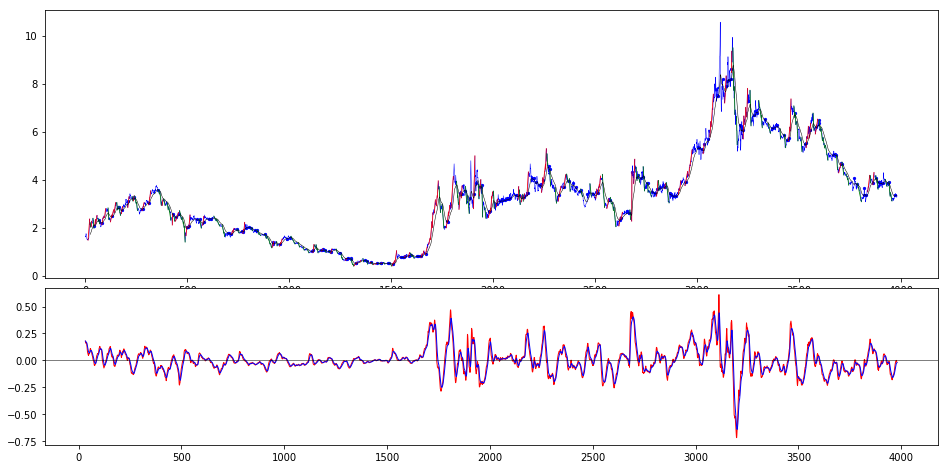

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))

### prices 
plt.subplot2grid((8, 1), (0, 0), rowspan = 5)
plt.plot(np.array(df['close']), 'k', lw = 0.5, color="b")

# breaks

for i in breaks :
    if i[2] == "Down" :
        plt.plot([i[0][0], i[1][0]],[i[0][1],i[1][1]], 'k', color="green", lw = 0.8)
    if i[2] == "up" :
        plt.plot([i[0][0], i[1][0]],[i[0][1],i[1][1]], 'k', color="red", lw = 0.8)


plt.plot(np.array(df['ema25']), 'k', lw = 0.5,color="black")
# plt.plot(np.arange(len(X))[pivots != 0], X[pivots != 0], 'k-', linewidth=.5,color="blue" )
# plt.scatter(np.arange(len(X))[pivots == 1], X[pivots == 1], color='y', s=1)
# plt.scatter(np.arange(len(X))[pivots == -1], X[pivots == -1], color='y', s=1)

plt.scatter(np.arange(len(X))[crossing_up], X[crossing_up], color='b', s=5)


        
# ### rsi

# plt.subplot2grid((8, 1), (5, 0))
# plt.plot(rsi[-wins:], color='black', lw=1)
# plt.axhline(y=30,     color='red',   linestyle='-')
# plt.axhline(y=70,     color='blue',  linestyle='-')


## MACD

plt.subplot2grid((8, 1), (5, 0), rowspan=7)

plt.plot(np.array(df['diff']), 'red', lw=1)
plt.plot(np.array(df['dea']), 'blue', lw=1)
plt.axhline(y=0, color='black', linestyle='-', lw=0.5)

# plt.subplot2grid((8, 1), (7, 0))

# plt.plot(macd[-wins:]-ema9[-wins:], 'k', lw = 2)
# plt.axhline(y=0, color='b', linestyle='-')

plt.show()

### 画图先看看画趋势线的效果

In [ ]:



plt.figure(1)

### prices

plt.subplot2grid((8, 1), (0, 0), rowspan = 4)
plt.plot(prices[-wins:], 'k', lw = 1)
